# Support Vector Machine (SVM) 

SVM is a supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well it’s best suited for classification. The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space. The hyperplane tries that the margin between the closest points of different classes should be as maximum as possible. The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane. It becomes difficult to imagine when the number of features exceeds three. 

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

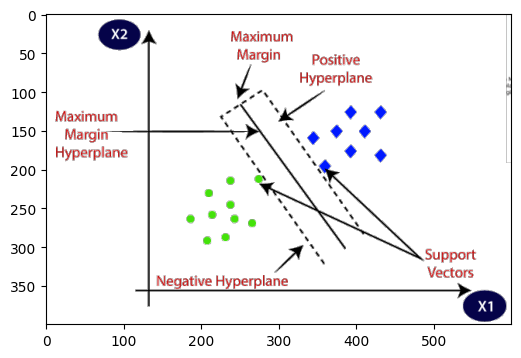

In [1]:
import cv2
import warnings
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings("ignore")
%matplotlib inline
plt.figure(figsize=(6,6))
imagedata=plt.imread("../input/svmimages/support-vector-machine-algorithm.png")
plt.imshow(imagedata)                   
plt.grid(False)
plt.show() 

The best hyperplane is that plane that has the maximum distance from both the classes, and this is the main aim of SVM. This is done by finding different hyperplanes which classify the labels in the best way then it will choose the one which is farthest from the data points or the one which has a maximum margin.

# The Role of Margins in SVMs:

Sometimes, the data is linearly separable, but the margin is so small that the model becomes prone to overfitting or being too sensitive to outliers. Also, in this case, we can opt for a larger margin by using soft margin SVM in order to help the model generalize better

**Hard vs Soft Margin**

* • When the data is linearly separable, and 
we don’t want to have any 
misclassifications, we use SVM with a hard 
margin. 
* • When a linear boundary is not feasible, 
or we want to allow some misclassifications 
in the hope of achieving better generality, 
we can opt for a soft margin for our 
classifier.

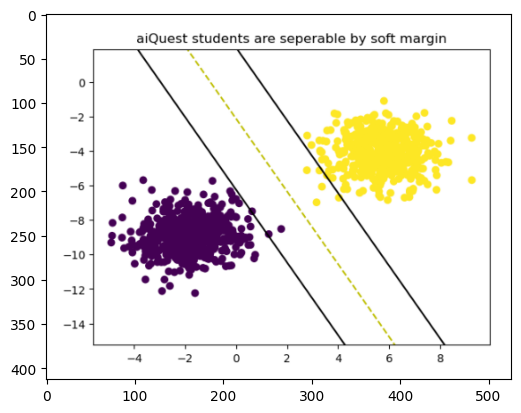

In [2]:
plt.figure(figsize=(6,6))
imagedata=plt.imread("../input/svm2img/svm2.png")
plt.imshow(imagedata)                   
plt.grid(False)
plt.show() 

# Support Vector Machine Terminology
* **Hyperplane**: Hyperplane is the decision boundary that is used to separate the data points of different classes in a feature space. In the case of linear classifications, it will be a linear equation i.e. wx+b = 0.
* **Support Vectors**: Support vectors are the closest data points to the hyperplane, which makes a critical role in deciding the hyperplane and margin. 
* **Margin**: Margin is the distance between the support vector and hyperplane. The main objective of the support vector machine algorithm is to maximize the margin.  The wider margin indicates better classification performance.
* **Kernel**: Kernel is the mathematical function, which is used in SVM to map the original input data points into high-dimensional feature spaces, so, that the hyperplane can be easily found out even if the data points are not linearly separable in the original input space. Some of the common kernel functions are linear, polynomial, radial basis function(RBF), and sigmoid.
* **Hard Margin**: The maximum-margin hyperplane or the hard margin hyperplane is a hyperplane that properly separates the data points of different categories without any misclassifications.
* **Soft Margin**: When the data is not perfectly separable or contains outliers, SVM permits a soft margin technique. Each data point has a slack variable introduced by the soft-margin SVM formulation, which softens the strict margin requirement and permits certain misclassifications or violations. It discovers a compromise between increasing the margin and reducing violations.
* **C**: Margin maximisation and misclassification fines are balanced by the regularisation parameter C in SVM. The penalty for going over the margin or misclassifying data items is decided by it. A stricter penalty is imposed with a greater value of C, which results in a smaller margin and perhaps fewer misclassifications.
* **Hinge Loss**: A typical loss function in SVMs is hinge loss. It punishes incorrect classifications or margin violations. The objective function in SVM is frequently formed by combining it with the regularisation term.
* **Dual Problem**: A dual Problem of the optimisation problem that requires locating the Lagrange multipliers related to the support vectors can be used to solve SVM. The dual formulation enables the use of kernel tricks and more effective computing.

# Types of Support Vector Machine

Based on the nature of the decision boundary, Support Vector Machines (SVM) can be divided into two main parts:

* **Linear SVM**: Linear SVMs use a linear decision boundary to separate the data points of different classes. When the data can be precisely linearly separated, linear SVMs are very suitable. This means that a single straight line (in 2D) or a hyperplane (in higher dimensions) can entirely divide the data points into their respective classes. A hyperplane that maximizes the margin between the classes is the decision boundary.
* **Non-Linear SVM**: Non-Linear SVM can be used to classify data when it cannot be separated into two classes by a straight line (in the case of 2D). By using kernel functions, nonlinear SVMs can handle nonlinearly separable data. The original input data is transformed by these kernel functions into a higher-dimensional feature space, where the data points can be linearly separated. A linear SVM is used to locate a nonlinear decision boundary in this modified space. 

# Linear SVM:

The working of the SVM algorithm can be understood by using an example. Suppose we have a dataset that has two tags (green and blue), and the dataset has two features x1 and x2. We want a classifier that can classify the pair(x1, x2) of coordinates in either green or blue. Consider the below image:

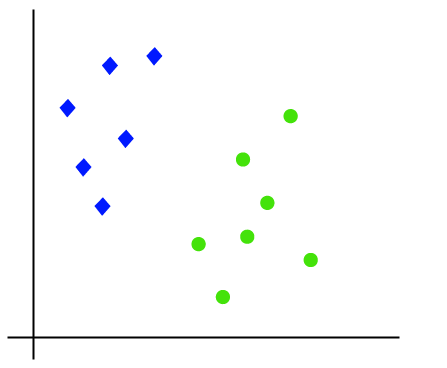

So as it is 2-d space so by just using a straight line, we can easily separate these two classes. But there can be multiple lines that can separate these classes. Consider the below image:

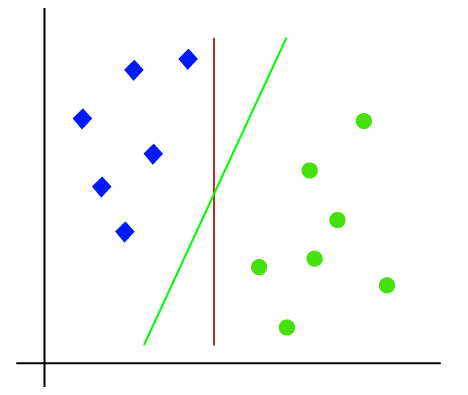

Hence, the SVM algorithm helps to find the best line or decision boundary; this best boundary or region is called as a hyperplane. SVM algorithm finds the closest point of the lines from both the classes. These points are called support vectors. The distance between the vectors and the hyperplane is called as margin. And the goal of SVM is to maximize this margin. The hyperplane with maximum margin is called the optimal hyperplane.

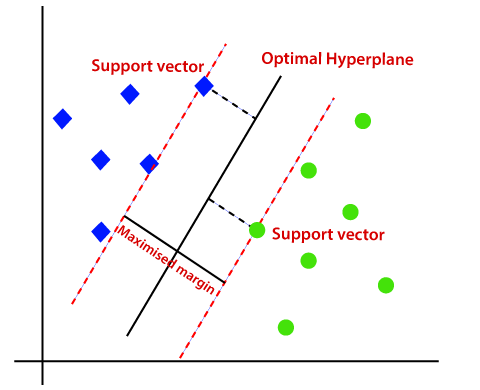

# Non-Linear SVM:

If data is linearly arranged, then we can separate it by using a straight line, but for non-linear data, we cannot draw a single straight line. 

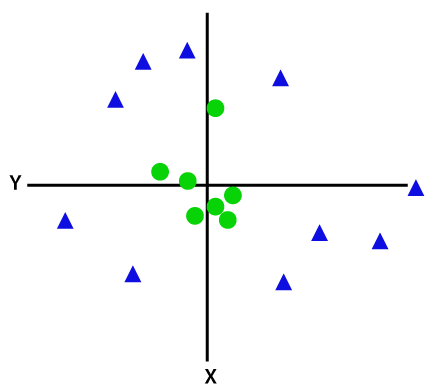

So to separate these data points, we need to add one more dimension. For linear data, we have used two dimensions x and y, so for non-linear data, we will add a third dimension z. It can be calculated as:**z=x2 +y2**

By adding the third dimension, the sample space will become as below image:

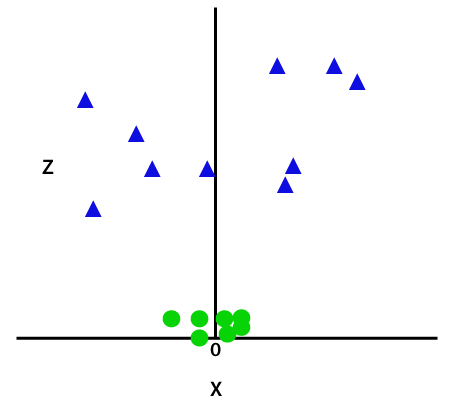

So now, SVM will divide the datasets into classes in the following way. Consider the below image:

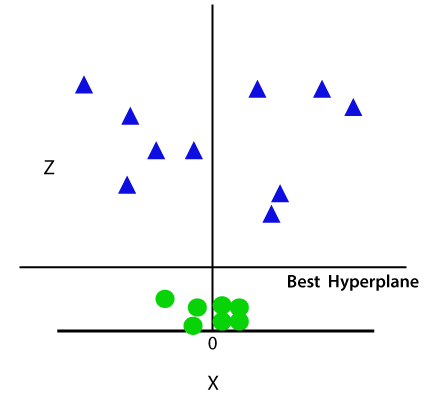

Since we are in 3-d Space, hence it is looking like a plane parallel to the x-axis. If we convert it in 2d space with z=1, then it will become as:

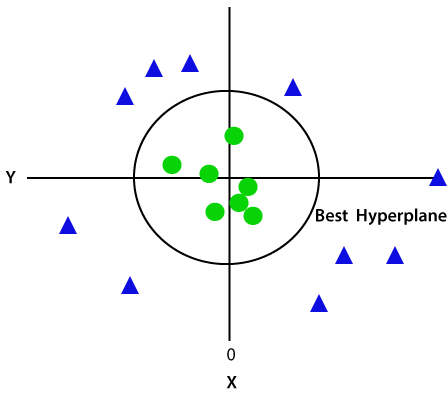

Hence we get a circumference of radius 1 in case of non-linear data.

# SVM implementation in Python

In [3]:
import pandas as pd
df=pd.read_csv("../input/svm-dataset/circle.csv")
df.head()

,Unnamed: 0,feature1,feature2,label_y
0,0,8.660254,-5.00000,0
1,1,8.717792,-4.89899,0
2,2,8.773790,-4.79798,0
3,3,8.828277,-4.69697,0
4,4,8.881281,-4.59596,0


In [4]:
df=df.drop('Unnamed: 0', axis=1)

df.head()

,feature1,feature2,label_y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


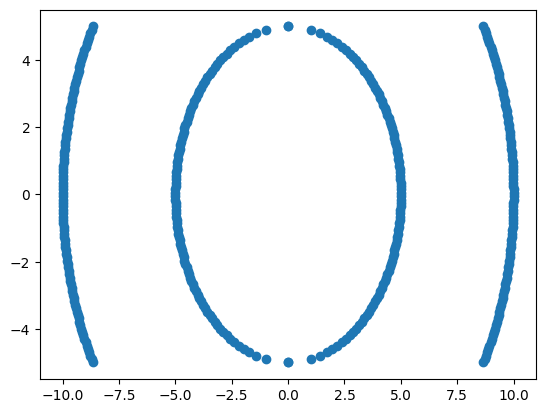

In [5]:
from matplotlib import pyplot as plt
plt.scatter(df.feature1,df.feature2)

In [6]:
df.label_y.value_counts()

label_y
0    200
1    200
Name: count, dtype: int64

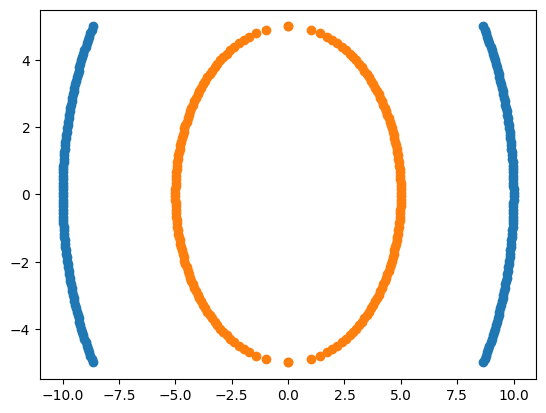

In [7]:
df1=df[df.label_y==0]
df2=df[df.label_y==1]

plt.scatter(df1.feature1 , df1.feature2)
plt.scatter(df2.feature1, df2.feature2)

In [8]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=.30)

In [9]:
train.head()

,feature1,feature2,label_y
205,2.189847,-4.494949,1
359,-4.907054,-0.959596,1
59,9.953852,0.959596,0
247,4.993619,-0.252525,1
313,-3.377425,3.686869,1


In [10]:
test.head()

,feature1,feature2,label_y
34,9.876676,-1.565657,0
157,-9.971263,-0.757576,0
88,9.212847,3.888889,0
163,-9.906589,-1.363636,0
144,-9.984556,0.555556,0


# out of svm

Data Generation: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [11]:
from sklearn.datasets import make_classification

In [12]:
x,y = make_classification(n_samples=100000,n_features=500,n_classes=2)

In [13]:
len(x)

100000

In [14]:
x

array([[ 0.45451948, -0.69862379, -0.22820766, ...,  0.96509897,
         1.85255125, -0.56191683],
       [ 0.66719039, -0.33830462, -0.32011087, ...,  1.56529328,
         0.96925786, -1.91103586],
       [-1.02111411, -0.1657068 , -0.78931353, ...,  0.08373558,
         0.49585001,  0.24251853],
       ...,
       [ 0.56213781,  1.01622836,  0.89721585, ..., -0.45047715,
         1.15496194,  0.74695984],
       [-0.54438954,  0.94213568,  1.23589659, ..., -0.47318888,
        -0.62125321,  2.41864695],
       [-0.89944622,  0.01527705,  0.72520141, ..., -1.09703992,
         1.01032029,  0.06800771]])

In [15]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.454519,-0.698624,-0.228208,0.747532,1.055457,-0.086750,0.326490,0.213170,-0.032989,-0.044290,...,0.962289,-0.032688,0.252977,-0.940578,1.565079,-1.094130,0.567678,0.965099,1.852551,-0.561917
1,0.667190,-0.338305,-0.320111,1.614578,0.285397,0.704485,-0.375056,-0.879489,-0.338186,-0.182167,...,0.696255,-1.020364,-0.558229,-0.270540,0.310751,-0.901531,0.246121,1.565293,0.969258,-1.911036
2,-1.021114,-0.165707,-0.789314,0.139539,0.899801,-2.014438,-0.332765,0.525281,0.962852,-0.251324,...,-0.383834,0.798462,-1.251507,0.004171,0.019195,0.737369,-0.303211,0.083736,0.495850,0.242519
3,0.514792,0.062028,1.485509,0.470782,-1.175226,-0.958050,0.443039,0.821901,0.344419,0.822258,...,-1.073829,1.734654,0.410343,-0.695898,0.160922,0.455148,1.613963,-0.798275,0.927267,0.162566
4,0.409562,0.680141,-0.182491,-1.389383,-1.067128,-0.108962,-0.159036,1.273489,0.606977,-0.138757,...,-1.554470,-1.050169,0.463986,-0.830738,-0.682783,0.057010,-0.784408,0.196860,-2.069967,0.277586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.294818,-0.824786,1.761054,1.390237,-1.095787,0.281561,0.513116,0.741613,0.451746,0.240209,...,-0.643227,-0.133137,0.016651,-0.267840,0.038087,-0.374702,0.269579,-1.767376,2.027029,-0.052821
99996,1.503133,-0.294187,1.139012,-1.006419,0.747718,0.743013,0.918664,0.676535,0.213781,-1.351578,...,-0.931262,-2.852467,0.798690,-0.099685,1.399691,0.163762,-0.658656,-0.778343,1.475052,0.408252
99997,0.562138,1.016228,0.897216,1.213898,-1.093192,-0.283544,-0.527579,1.274661,-0.309033,-1.299007,...,-0.023450,-0.685199,0.346536,-1.003345,-0.713560,-1.038427,-0.486527,-0.450477,1.154962,0.746960
99998,-0.544390,0.942136,1.235897,-0.050327,-0.352386,-0.065617,1.110152,-0.943574,1.193014,1.369075,...,0.915598,0.754840,1.237070,0.009463,0.492604,-0.905370,-0.811833,-0.473189,-0.621253,2.418647


In [ ]:
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=1000000,n_features=500)
pd.DataFrame(y)

# IN SVM

In [ ]:
from sklearn.svm import SVC #CLASSIFICATION
from sklearn.svm import SVR # REGRESSION

In [ ]:
df1 = df[df.label_y == 0]
df2 = df[df.label_y == 1]

plt.scatter(df1.feature1 , df1.feature2, label = 'Class 0')
plt.scatter(df2.feature1 , df2.feature2, label = 'Class 1')

plt.legend()
plt.show()

# Linear

In [ ]:
svm1= SVC(kernel='linear')

In [ ]:
svm1.fit(df.drop('label_y', axis=1), df.label_y)

In [ ]:
svm1.score(test.drop('label_y', axis=1), test.label_y) #testing

In [ ]:
svm1.score(df.drop('label_y', axis=1), df.label_y) # total data

In [ ]:
f1 = df['feature1']
f2 = df['feature2']
f1_square = df['feature1']**2
f2_square = df['feature2']**2
f1f2 = df['feature1']*df['feature2']

In [ ]:
df['f1_square'] = df['feature1']**2
df['f2_square'] = df['feature2']**2
df['f1f2']= df['feature1']*df['feature2']

In [ ]:
df.head()

In [ ]:
x = df.drop('label_y', axis=1)
y = df['label_y']

In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
import plotly.express as px
px.scatter_3d(df, x='f1_square', y = 'f2_square', z='f1f2', color='label_y')